In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
%matplotlib inline

In [27]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.sort_values(by=['user_id', 'time_stamp'], inplace=True)
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [46]:
time_diff_dict = {}
for user_id in tqdm(range(1, 12001)):
    date_diff = []
    user_timestamp = engagement[engagement['user_id'] == user_id]
    for i in range(len(user_timestamp)):
        try:
            date_diff = list(user_timestamp['time_stamp'].diff())
        except:
            date_diff = [np.nan]
            print(user_id, i)
    time_diff_dict[user_id] = date_diff

100%|██████████| 12000/12000 [05:00<00:00, 39.89it/s] 


In [92]:
adoption_count = {}
for user in list(time_diff_dict.keys()):
    diff_series = pd.Series(time_diff_dict[user]).dropna()
    user_diffs = list(diff_series)
    num_adoptions = 0
    for i in range(len(user_diffs)):
        try:    
            if (user_diffs[i] + user_diffs[i+1]).days <= 7:
                    num_adoptions += 1
        except:
            num_adoptions += 0
    adoption_count[user] = num_adoptions

In [216]:
users = pd.read_csv('takehome_users.csv', parse_dates=True, encoding='latin')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [217]:
users['last_session_dt'] = pd.to_datetime(users['last_session_creation_time'], origin='unix', unit='s')
users.drop('last_session_creation_time', axis=1, inplace=True)
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20


In [218]:
users['adoptions'] = users['object_id'].map(adoption_count)
users['is_adopted'] = users['adoptions'] > 0
#users['is_adopted'] = users['is_adopted'].astype(int)
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_dt,adoptions,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30,0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,3,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52,0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28,0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20,0,False


In [219]:
users = pd.get_dummies(users, columns=['creation_source'])

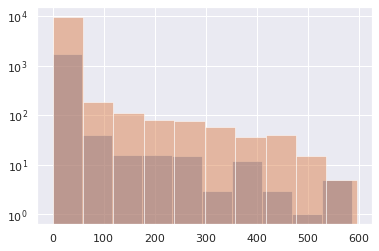

In [220]:
users[users['enabled_for_marketing_drip'] == 1]['adoptions'].hist(alpha=0.5)
users[users['enabled_for_marketing_drip'] == 0]['adoptions'].hist(alpha=0.5)
plt.yscale('log')
plt.show()

In [221]:
features = users[['is_adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]

In [267]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_roc_curve(model, X_test, y_test, name):
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    no_skill = np.zeros(len(y_test))
    tpr, fpr, thresh = roc_curve(y_test, probs, pos_label=0)
    ns_tpr, ns_fpr, ns_thresh = roc_curve(y_test, no_skill, pos_label=0)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill, AUC = %.2f' % auc(ns_fpr, ns_tpr))
    plt.plot(fpr, tpr, marker='.', markersize=0.1, label='%s, AUC = %.2f' % (name, auc(fpr, tpr)))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve for %s' % name, fontsize=18)
    plt.legend()
    plt.show()

def plot_feature_importance(model, X):
    feature_ranks = np.flip(np.argsort(model.feature_importances_))
    feature_names = []
    for i in feature_ranks:
        feature_names.append(X.columns[i])
    sns.barplot(x=feature_names, y=np.flip(np.sort(model.feature_importances_)))
    plt.xticks(rotation=45, fontsize=14, ha='right')
    plt.yticks(fontsize=14)
    plt.xlabel('Feature name', fontsize=16)
    plt.ylabel('Feature importance', fontsize=16)
    plt.title('Features Ranked', fontsize=18)
    plt.show()

def plot_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.xticks(ticks=[0.5, 1.5], fontsize=14)
    plt.yticks(ticks=[0.5, 1.5], fontsize=14)
    plt.xlabel('Predicted labels', fontsize=16)
    plt.ylabel('True labels', fontsize=16)
    plt.title('Confusion Matrix', fontsize=18)
    plt.tight_layout()
    plt.show()

In [222]:
from sklearn.model_selection import train_test_split

X = features.iloc[:, 1:]
y = features['is_adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [224]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=16).fit(X_train, y_train)
print('Train accuracy:', log_reg.score(X_train, y_train), 'Test accuracy:', log_reg.score(X_test, y_test))

Train accuracy: 0.8634444444444445 Test accuracy: 0.858


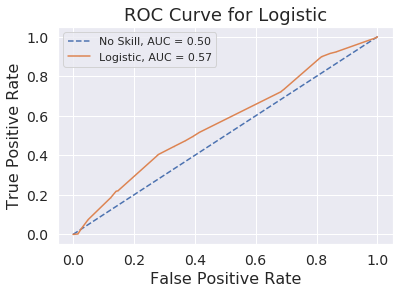

In [268]:
plot_roc_curve(log_reg, X_test, y_test, 'Logistic')

In [232]:
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(random_state=16).fit(X_train, y_train)
print('Train accuracy:', rf_mod.score(X_train, y_train), 'Test accuracy:', rf_mod.score(X_test, y_test))

Train accuracy: 0.8634444444444445 Test accuracy: 0.858


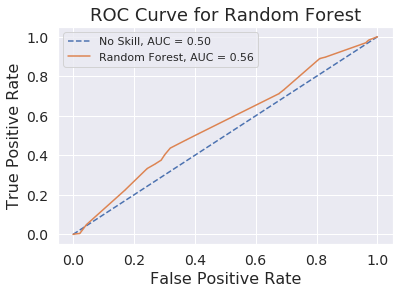

In [269]:
plot_roc_curve(rf_mod, X_test, y_test, 'Random Forest')

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

gb_mod = GradientBoostingClassifier(random_state=16).fit(X_train, y_train)
print('Train accuracy:', gb_mod.score(X_train, y_train), 'Test accuracy:', gb_mod.score(X_test, y_test))

Train accuracy: 0.8634444444444445 Test accuracy: 0.858


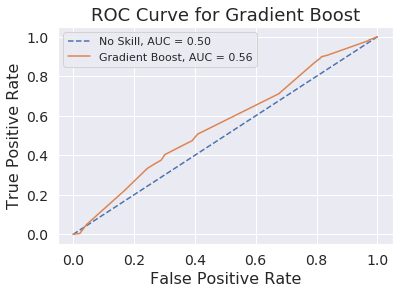

In [270]:
plot_roc_curve(gb_mod, X_test, y_test, 'Gradient Boost')

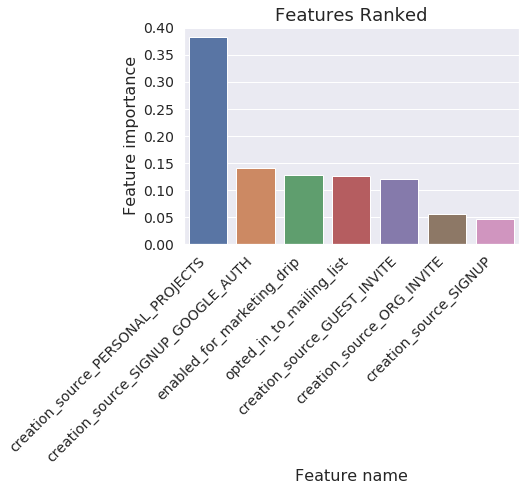

In [272]:
plot_feature_importance(rf_mod, X)

<Figure size 576x432 with 0 Axes>

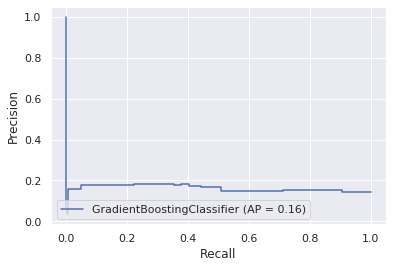

In [241]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

y_score = gb_mod.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plot_precision_recall_curve(gb_mod, X_test, y_test)
plt.show()

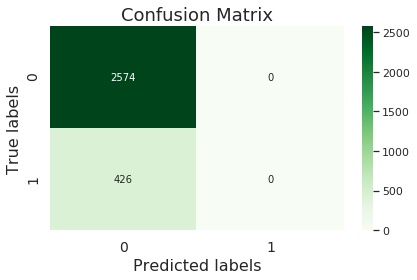

In [274]:
plot_confusion_matrix(gb_mod, X_test, y_test)

In [252]:
from sklearn.utils import resample

train_data = pd.concat([X_train, y_train], axis=1)
not_adopted = train_data[train_data.is_adopted==0]
adopted = train_data[train_data.is_adopted==1]

# upsample minority
adopted_upsampled = resample(adopted,
                          replace=True, # sample with replacement
                          n_samples=len(not_adopted), # match number in majority class
                          random_state=16) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_adopted, adopted_upsampled])

X_up = upsampled.drop('is_adopted', axis=1)
y_up = upsampled['is_adopted']

In [260]:
from sklearn.ensemble import RandomForestClassifier

rf_up = RandomForestClassifier(random_state=16).fit(X_up, y_up)
print('Train accuracy:', rf_up.score(X_up, y_up), 'Test accuracy:', rf_up.score(X_test, y_test))

Train accuracy: 0.5470981855617038 Test accuracy: 0.37533333333333335


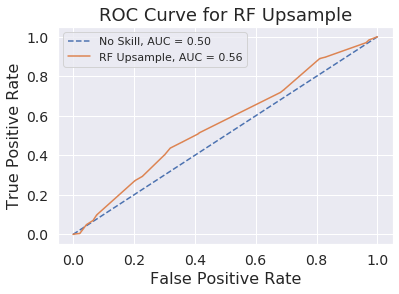

In [275]:
plot_roc_curve(rf_up, X_test, y_test, 'RF Upsample')

In [276]:
from sklearn.linear_model import LogisticRegression

log_up = LogisticRegression(random_state=16).fit(X_up, y_up)
print('Train accuracy:', log_up.score(X_up, y_up), 'Test accuracy:', log_up.score(X_test, y_test))

Train accuracy: 0.5417578175267018 Test accuracy: 0.289


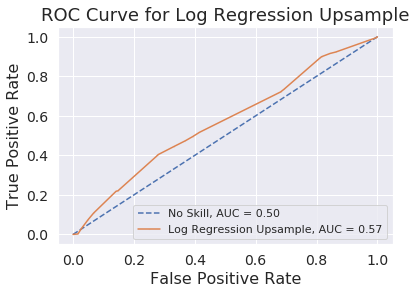

In [277]:
plot_roc_curve(log_up, X_test, y_test, 'Log Regression Upsample')

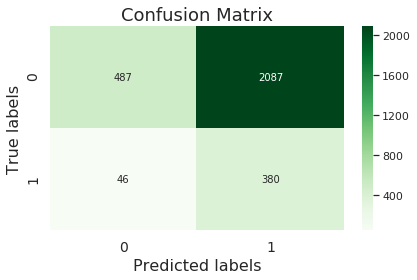

In [278]:
plot_confusion_matrix(log_up, X_test, y_test)